In this notebook, I analysis the orignal data from the paper "Auto-generated database of semiconductor band gaps using ChemDataExtractor" by Qingyang Dong & Jacqueline M. Cole. Link to the paper: https://www.nature.com/articles/s41597-022-01294-6

In [2]:
import pandas as pd
import numpy as np
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pymatgen.core import Structure

In [11]:

def categorize_compound(formula):
    # Define regular expressions for each category, ordered by priority
    categories = {
        "Double anions": r"[A-Za-z]+\d?2",
        "Halides": r"F|Cl|Br|I",
        "Chalcogenides": r"S|Se|Te",
        "Oxides": r"O(?![A-Za-z])",
        "Nitrides": r"N(?![A-Za-z])",
        "Phosphides": r"P(?![A-Za-z])",
        "Arsenides": r"As",
        "Antimonides": r"Sb",
        "Silicides": r"Si",
        "Carbides": r"C(?![A-Za-z])",
        "Hydrides": r"H(?![A-Za-z])",
        "Others": None  # Default category
    }

    matched_categories = []

    # Check each category in priority order
    for category, pattern in categories.items():
        if pattern and re.search(pattern, formula):
            matched_categories.append(category)

    # If multiple categories match, prioritize based on the first match
    if matched_categories:
        return matched_categories[0]  # Return the highest-priority match

    # If no category matched, return "Others"
    return "Others"

In [12]:
df_mp = pd.read_csv('selected_data.csv')
df_mp['compound_type'] = df_mp['formula'].apply(categorize_compound)
# df_mp =  df_mp.sort_values("formation_energy_per_atom").drop_duplicates("formula", keep="first")
# return the total number of rows
print("Total number of rows: ", len(df_mp))
# return the number of unique formulas
print("Number of unique formulas: ", len(df_mp['formula'].unique()))
# get a df for unique formulas and its compound type
# unique_formulas = df_mp[['formula', 'compound_type']].drop_duplicates()
# get the number of unique formulas for each compound type
df_mp['compound_type'].value_counts()

Total number of rows:  61569
Number of unique formulas:  41864


compound_type
Double anions    33693
Halides           9377
Oxides            9366
Chalcogenides     8112
Nitrides           501
Hydrides           194
Phosphides         119
Carbides            70
Arsenides           69
Others              68
Name: count, dtype: int64

In [13]:
# load json dataset and convert it to a pandas dataframe
import json
with open('data/ds1.json') as f:
    ds1 = json.load(f)
ds1 = pd.DataFrame(ds1)
# transpose the dataframe
ds1 = ds1.T
# Reset the index and make the index a column named 'mpids'
ds1 = ds1.reset_index().rename(columns={'index': 'mpids'})
# return the number of data points that has 'formula' matched with 'formula' in the original dataset
print("Number of data points that has 'formula' matched with 'formula' in the original dataset: ", len(ds1[ds1['formula'].isin(df_mp['formula'])]))

Number of data points that has 'formula' matched with 'formula' in the original dataset:  17081


In [14]:
ds1

,mpids,formula,bg_mp
0,mp-7090,NaMgSb,1.076
1,mp-9272,TlPt2S3,1.0256
2,mp-9251,TlTe3Pt2,0.11
3,mp-19247,ScVO4,2.6851
4,mp-754741,ZrO2,3.4273
...,...,...,...
19317,mp-1013711,Ba3AsP,0.3855
19318,mp-771179,Li4Nb5Cr3O16,0.0439
19319,mp-775004,Fe3P6WO24,0.079
19320,mp-779369,Fe5(OF4)2,0.122


In [15]:
df_mp

,mpids,formula,elements,is_stable,theoretical,band_gap,formation_energy_per_atom,compound_type
0,mp-11107,Ac2O3,"[Element Ac, Element O]",True,False,3.5226,-3.737668,Double anions
1,mp-32800,Ac2S3,"[Element Ac, Element S]",True,True,2.2962,-2.492486,Double anions
2,mp-977351,Ac2S3,"[Element Ac, Element S]",False,True,3.0275,-2.439787,Double anions
3,mp-1183115,AcAlO3,"[Element Ac, Element Al, Element O]",True,True,4.1024,-3.690019,Oxides
4,mp-1183052,AcBO3,"[Element Ac, Element B, Element O]",False,True,0.8071,-2.475390,Oxides
...,...,...,...,...,...,...,...,...
61564,mp-554326,ZrV2O7,"[Element O, Element V, Element Zr]",True,False,2.5909,-2.817253,Double anions
61565,mp-557686,ZrVF6,"[Element F, Element V, Element Zr]",False,False,2.4073,-3.648452,Halides
61566,mp-2713859,ZrZn(SO4)3,"[Element O, Element S, Element Zn, Element Zr]",True,True,4.0187,-2.209007,Chalcogenides
61567,mp-1093871,ZrZnAu2,"[Element Au, Element Zn, Element Zr]",False,True,0.6956,1.486798,Double anions


In [16]:
# check if the value in ds1['bg_mp'] is same as df_mp['band_gap'] when 'formula' is same
print("Number of data points that has 'bg_mp' matched with 'band_gap' in the original dataset: ", len(ds1[(ds1['mpids'].isin(df_mp['mpids'])) & (ds1['bg_mp'].isin(df_mp['band_gap']))]))
# return where 'formula' is same but 'bg_mp' and 'band_gap' are different. print both the values of 'bg_mp' and 'band_gap'
print(ds1[(ds1['mpids'].isin(df_mp['mpids'])) & (ds1['bg_mp'] != df_mp['band_gap'])][['bg_mp', 'mpids']])

Number of data points that has 'bg_mp' matched with 'band_gap' in the original dataset:  9682


ValueError: Can only compare identically-labeled Series objects

In [17]:
# Merge ds1 and df_mp on 'formula' to ensure alignment
merged = ds1.merge(df_mp, on='mpids', suffixes=('_ds1', '_dfmp'))

# Check for matches
matched = merged[merged['bg_mp'] == merged['band_gap']]
print("Number of data points that have 'bg_mp' matched with 'band_gap':", len(matched))

# Check for mismatches
mismatched = merged[merged['bg_mp'] != merged['band_gap']]
print("Rows where 'bg_mp' and 'band_gap' are different:")
print(mismatched[['mpids', 'bg_mp', 'band_gap']])

Number of data points that have 'bg_mp' matched with 'band_gap': 509
Rows where 'bg_mp' and 'band_gap' are different:
           mpids   bg_mp  band_gap
0        mp-7090   1.076    1.0359
1        mp-9272  1.0256    1.0256
2       mp-19247  2.6851    2.6851
3      mp-754741  3.4273    3.4022
4       mp-30244  3.5667    3.5665
...          ...     ...       ...
16306  mp-783919  0.0916    3.8643
16307  mp-504828  3.3038    3.3069
16308  mp-504151  0.5401    0.5567
16309  mp-849376  0.1657    1.3514
16310  mp-780482  1.4725    1.4548

[15802 rows x 3 columns]


In [18]:
# Generate JSON file with mpids as keys and Value as bg
data_json = df_mp.set_index('mpids')['band_gap'].to_dict()
data_json = {key: {"bg": value} for key, value in data_json.items()}

# Save the JSON to a file
with open('pretrain_data.json', 'w') as json_file:
    json.dump(data_json, json_file, indent=4)

print("Processed data saved to 'pretrain_data.json'")

Processed data saved to 'pretrain_data.json'


In [19]:
# Load the data
df = pd.read_csv('Bandgap.csv')
df['compound_type'] = df['Name'].apply(categorize_compound)

/tmp/ipykernel_2223975/273538880.py:2: DtypeWarning: Columns (4,5,10,11,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bandgap.csv')


In [20]:
df

,Name,Composition,Value,Unit,Raw_value,Raw_unit,Snowball,Confidence,AutoSentenceParser,BandgapDB,Text,Publisher,DOI,Temperature_value,Temperature_unit,Temperature_raw_value,Temperature_raw_unit,Notes,compound_type
0,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV,True,1.000000,True,False,The photon which can excite an electron to jum...,Elsevier,10.1016/j.cej.2006.05.011,NaN,NaN,NaN,NaN,NaN,Double anions
1,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV),True,1.000000,True,False,The band gap energy of TiO2 is wide enough (E\...,Elsevier,10.1016/j.cej.2006.07.006,NaN,NaN,NaN,NaN,NaN,Double anions
2,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV),True,0.857711,True,False,But the anatase TiO2 has a much large band gap...,Elsevier,10.1016/j.cej.2006.09.009,NaN,NaN,NaN,NaN,NaN,Double anions
3,MoS2,"{'Mo': 1.0, 'S': 2.0}",[1.69],ElectronVolt^(1.0),1.69,eV,True,0.971041,True,False,MoS2 is an indirect band gap semiconductor wit...,Elsevier,10.1016/j.cej.2007.05.028,NaN,NaN,NaN,NaN,NaN,Double anions
4,TiO2,"{'Ti': 1.0, 'O': 2.0}","[3.0, 3.2]",ElectronVolt^(1.0),3.0–3.2,eV),False,NaN,True,False,"However, the principle deficiency of TiO2 is i...",Elsevier,10.1016/j.cej.2007.05.028,NaN,NaN,NaN,NaN,NaN,Double anions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100231,KBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'K': 1.0, 'Bi': 2.0, 'F':...",[2.89],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions
100232,RbBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'Rb': 1.0, 'Bi': 2.0, 'F'...",[3.78],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions
100233,RbBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'Rb': 1.0, 'Bi': 2.0, 'F'...",[2.97],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions
100234,CsBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'Cs': 1.0, 'Bi': 2.0, 'F'...",[3.84],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions


In [21]:
df['Value'] = df['Value'].apply(lambda x:[float(i) for i in ast.literal_eval(x)])
df_filtered = df[df['Value'].apply(len)==1]

In [22]:
df_filtered

,Name,Composition,Value,Unit,Raw_value,Raw_unit,Snowball,Confidence,AutoSentenceParser,BandgapDB,Text,Publisher,DOI,Temperature_value,Temperature_unit,Temperature_raw_value,Temperature_raw_unit,Notes,compound_type
0,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV,True,1.000000,True,False,The photon which can excite an electron to jum...,Elsevier,10.1016/j.cej.2006.05.011,NaN,NaN,NaN,NaN,NaN,Double anions
1,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV),True,1.000000,True,False,The band gap energy of TiO2 is wide enough (E\...,Elsevier,10.1016/j.cej.2006.07.006,NaN,NaN,NaN,NaN,NaN,Double anions
2,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV),True,0.857711,True,False,But the anatase TiO2 has a much large band gap...,Elsevier,10.1016/j.cej.2006.09.009,NaN,NaN,NaN,NaN,NaN,Double anions
3,MoS2,"{'Mo': 1.0, 'S': 2.0}",[1.69],ElectronVolt^(1.0),1.69,eV,True,0.971041,True,False,MoS2 is an indirect band gap semiconductor wit...,Elsevier,10.1016/j.cej.2007.05.028,NaN,NaN,NaN,NaN,NaN,Double anions
5,TiO2,"{'Ti': 1.0, 'O': 2.0}",[3.2],ElectronVolt^(1.0),3.2,eV,False,NaN,True,False,"The result is not surprising because, as menti...",Elsevier,10.1016/j.cej.2007.05.028,NaN,NaN,NaN,NaN,NaN,Double anions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100231,KBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'K': 1.0, 'Bi': 2.0, 'F':...",[2.89],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions
100232,RbBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'Rb': 1.0, 'Bi': 2.0, 'F'...",[3.78],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions
100233,RbBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'Rb': 1.0, 'Bi': 2.0, 'F'...",[2.97],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions
100234,CsBi2 (IO3)2F5,"{'I': 2.0, 'O': 6.0, 'Cs': 1.0, 'Bi': 2.0, 'F'...",[3.84],ElectronVolt^(1.0),NaN,NaN,False,NaN,False,True,NaN,NaN,10.1002/ange.201705672,[300.0],Kelvin^(1.0),NaN,NaN,NaN,Double anions


In [23]:
# return the total number of rows
print("Total number of rows: ", len(df_filtered))
# return the number of unique formulas
print("Number of unique formulas: ", len(df_filtered['Name'].unique()))
# get a df for unique formulas and its compound type
unique_formulas = df_filtered[['Name', 'compound_type']].drop_duplicates()
# get the number of unique formulas for each compound type
unique_formulas['compound_type'].value_counts()

Total number of rows:  88121
Number of unique formulas:  19440


compound_type
Double anions    6308
Others           4371
Chalcogenides    2771
Halides          2763
Oxides           1589
Nitrides          641
Phosphides        411
Carbides          249
Hydrides          229
Arsenides         108
Name: count, dtype: int64

In [27]:
# count of different values in 'temprarure' column of df_filtered
df_filtered['Temperature_value'].value_counts()
# number of NaN values in 'Temperature_value' column
df_filtered['Temperature_value'].isnull().sum()

76089

The table counts the number of unique formulas for each compound type. There is no Silicides or Antimonides in the dataset.

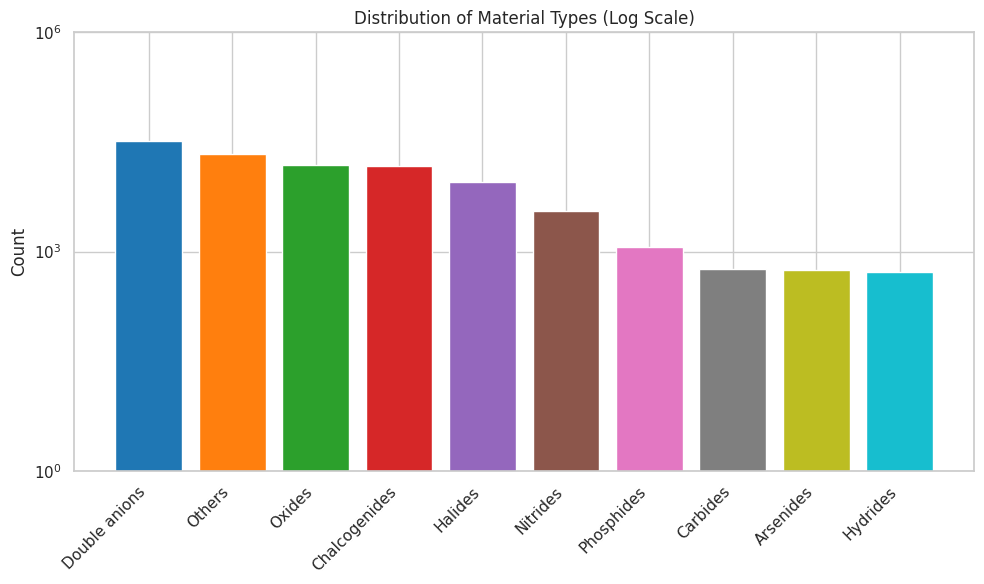

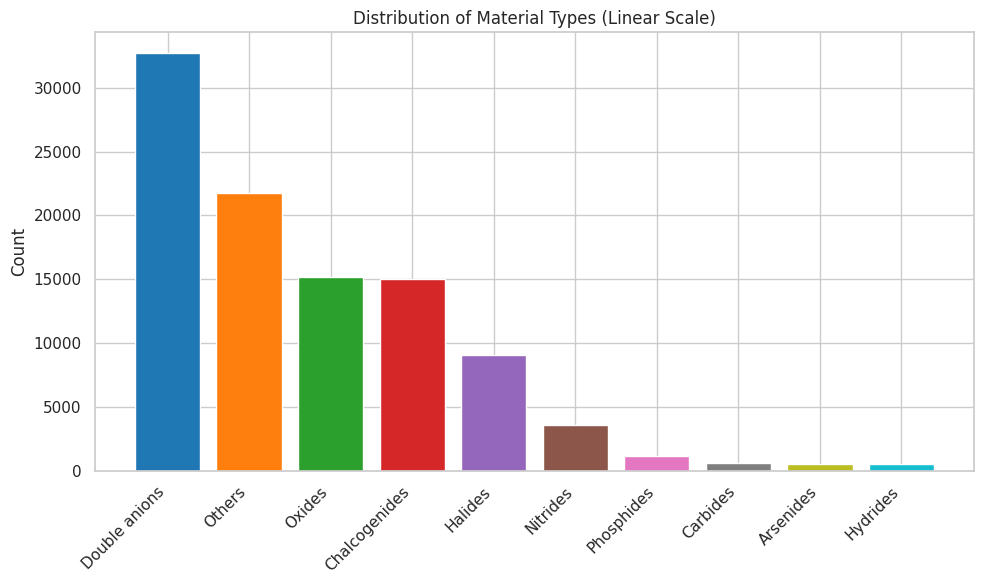

In [53]:
data_counts = df["compound_type"].value_counts()
# Plotting the distribution in log scale
plt.figure(figsize=(10, 6))
plt.bar(data_counts.index, data_counts.values, color=plt.cm.tab10(np.linspace(0, 1, len(data_counts))))
plt.yscale('log')
plt.ylabel('Count')
plt.yscale('log')
plt.yticks([10**0, 10**3, 10**6], [r'$10^0$', r'$10^3$', r'$10^6$'])
plt.title('Distribution of Material Types (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the distribution in normal scale
plt.figure(figsize=(10, 6))
plt.bar(data_counts.index, data_counts.values, color=plt.cm.tab10(np.linspace(0, 1, len(data_counts))))
plt.ylabel('Count')
plt.title('Distribution of Material Types (Linear Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
# Step 2: Group data to get summary statistics and sort by count in descending order
grouped_data = df_filtered.groupby("compound_type")["Raw_value"].agg(['mean', 'count']).reset_index()
grouped_data = grouped_data.sort_values(by='count', ascending=False).reset_index(drop=True)

# Plotting the distribution of 'bg_mp' for each individual class
sns.set(style="whitegrid")

# Define number of rows and columns for the subplots
n_cols = 3
n_rows = (len(grouped_data) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, row in grouped_data.iterrows():
    mat_type = row["compound_type"]
    ax = axes[i]
    subset = df_filtered[df_filtered["compound_type"] == mat_type]

    # Plot histogram for the current material type
    sns.histplot(subset["Raw_value"], kde=True, bins=10, color="skyblue", ax=ax)

    # Get mean and count for the current material type
    mean_value = row['mean']
    count_value = row['count']

    # Add the mean and count annotations
    ax.text(0.95, 0.95,
            f'Count: {int(count_value)}\nMean: {mean_value:.2f} eV',
            verticalalignment='top',
            horizontalalignment='right',
            transform=ax.transAxes,
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Set titles and labels
    ax.set_title(mat_type)
    ax.set_xlim(0, 5)
    ax.set_xlabel("Band gaps (eV)")
    ax.set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

In [36]:
print(df_filtered["Raw_value"].dtype)

object


In [41]:
# Ensure 'Raw_unit' has no NaN values before using str.contains
df_filtered["Raw_unit"] = df_filtered["Raw_unit"].fillna("")

# Convert 'Raw_value' to numeric, coercing errors into NaN
df_filtered["Raw_value"] = pd.to_numeric(df_filtered["Raw_value"], errors="coerce")

# Safely update 'Raw_value' where 'Raw_unit' contains 'meV'
df_filtered.loc[df_filtered["Raw_unit"].str.contains("meV", na=False), "Raw_value"] /= 1000

# Verify the results
print(df_filtered.head())


   Name            Composition   Value                Unit  Raw_value  \
0  TiO2  {'Ti': 1.0, 'O': 2.0}   [3.2]  ElectronVolt^(1.0)       3.20   
1  TiO2  {'Ti': 1.0, 'O': 2.0}   [3.2]  ElectronVolt^(1.0)       3.20   
2  TiO2  {'Ti': 1.0, 'O': 2.0}   [3.2]  ElectronVolt^(1.0)       3.20   
3  MoS2  {'Mo': 1.0, 'S': 2.0}  [1.69]  ElectronVolt^(1.0)       1.69   
5  TiO2  {'Ti': 1.0, 'O': 2.0}   [3.2]  ElectronVolt^(1.0)       3.20   

  Raw_unit  Snowball  Confidence  AutoSentenceParser  BandgapDB  \
0       eV      True    1.000000                True      False   
1      eV)      True    1.000000                True      False   
2      eV)      True    0.857711                True      False   
3       eV      True    0.971041                True      False   
5       eV     False         NaN                True      False   

                                                Text Publisher  \
0  The photon which can excite an electron to jum...  Elsevier   
1  The band gap energy of 

/tmp/ipykernel_1422208/2347535131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Raw_unit"] = df_filtered["Raw_unit"].fillna("")
/tmp/ipykernel_1422208/2347535131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Raw_value"] = pd.to_numeric(df_filtered["Raw_value"], errors="coerce")
